In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
df = pd.read_csv("/content/drive/MyDrive/Weather/input/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Preprocessing

In [43]:
df = df[['Formatted Date', 'Temperature (C)']]
df['Date'] = pd.to_datetime(df['Formatted Date'], yearfirst=True, utc=True)
df['Date_day'] = df['Date'].map(lambda date: f'{date.year}-{date.month}-{date.day}')
df = df.sort_values(by=['Date'], ascending=True).reset_index()

In [44]:
df_day = df.groupby(['Date_day'])['Temperature (C)'].mean().reset_index()
df_day['Date'] = pd.to_datetime(df_day['Date_day'], yearfirst=True)
df_day = df_day.sort_values(by=['Date'], ascending=True).reset_index()
df_day['My_Date_Day'] = df_day['Date'].map(lambda date: f"{30 * (date.month - 1) + date.day}")
df_day['My_Date_Month_Day'] = df_day['Date'].map(lambda date: f"{date.month}-{date.day}")

df_day.head()

,index,Date_day,Temperature (C),Date,My_Date_Day,My_Date_Month_Day
0,0,2005-12-31,0.577778,2005-12-31,361,12-31
1,1,2006-1-1,4.075000,2006-01-01,1,1-1
2,12,2006-1-2,5.263194,2006-01-02,2,1-2
3,23,2006-1-3,2.340509,2006-01-03,3,1-3
4,26,2006-1-4,2.251852,2006-01-04,4,1-4


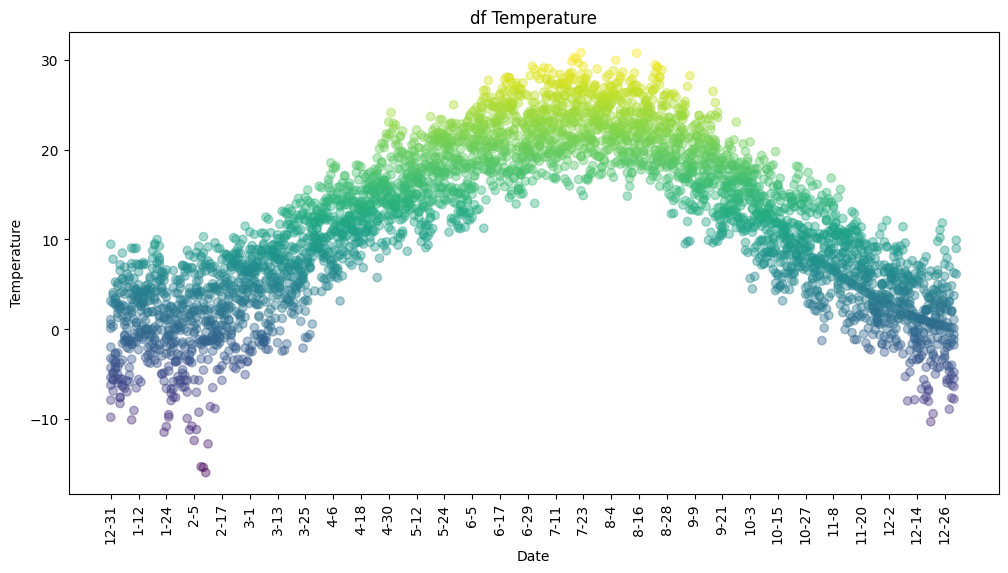

In [45]:
plt.figure(figsize=(12, 6))

plt.scatter(df_day['My_Date_Month_Day'].to_numpy(), df_day['Temperature (C)'].to_numpy(), alpha=.4,
            c=df_day['Temperature (C)'])
plt.title("df Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation="vertical")
plt.xticks(np.arange(0, 365, 12))
plt.show()

## Modeling

In [46]:
X = df_day['My_Date_Day'].copy().to_numpy(int)
y = df_day['Temperature (C)'].copy().values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3215,), (804,), (3215,), (804,))

In [48]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3215, 1) (804, 1) (3215, 1) (804, 1)


### MLP

In [49]:
model_mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(72, activation='sigmoid'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

model_mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

In [50]:
output_mlp = model_mlp.fit(X_train, y_train, epochs=100)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 148.4541
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63.7416
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.9321
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.1073
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.9884
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.0140
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.0451
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.9694
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.7068
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.9209
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.9459
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.2912
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.8522
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.5099
Epoch 15/100
101/101 ━━━━━━━

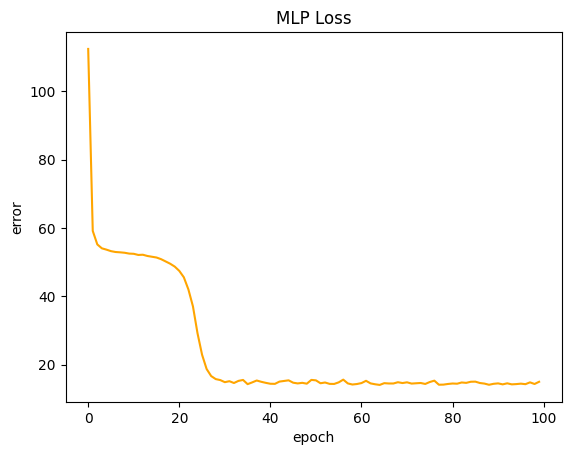

In [51]:
plt.plot(output_mlp.history['loss'], c='orange')
plt.title("MLP Loss")
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

In [52]:
loss_mlp = model_mlp.evaluate(X_test, y_test)
loss_mlp

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.5218  


13.331254959106445

In [53]:
Y_pred = model_mlp.predict(X_test).reshape(-1, 1)
Y_pred.shape, X_test.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


((804, 1), (804, 1))

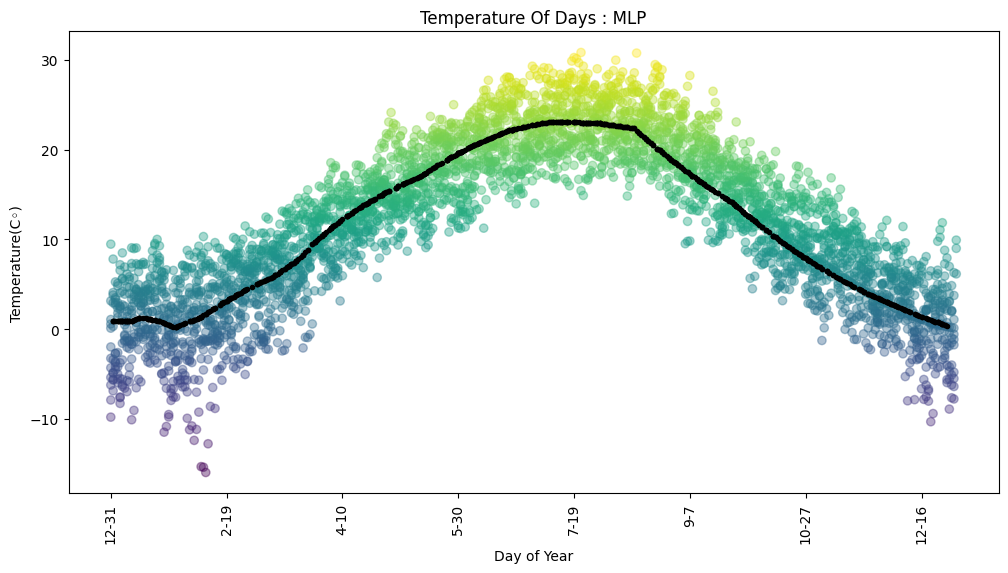

In [54]:
plt.figure(figsize=(12, 6))

plt.scatter(df_day['My_Date_Month_Day'].to_numpy(), df_day['Temperature (C)'].to_numpy(), alpha=.4,
            c=df_day['Temperature (C)'])
plt.plot(X_test, Y_pred, '.', c='black')
plt.title('Temperature Of Days : MLP')
plt.xlabel('Day of Year')
plt.ylabel('Temperature(C◦)')
plt.xticks(np.arange(0, 365, 50), rotation='vertical')
plt.show()

### Perceptron

In [55]:
model_perceptron = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

In [56]:
model_perceptron.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

In [57]:
output_perceptron = model_perceptron.fit(X_train, y_train, epochs=100)

Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 79899.0938
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66394.6484
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56291.5469
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49413.9297
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41848.0352
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 34788.0195
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28368.8281
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23379.1699
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18737.8262
Epoch 10/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15111.5479
Epoch 11/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12123.6719
Epoch 12/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9670.6094 
Epoch 13/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7477.7095
Epoch 14/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [59]:
loss_perceptron = model_perceptron.evaluate(X_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.3754  


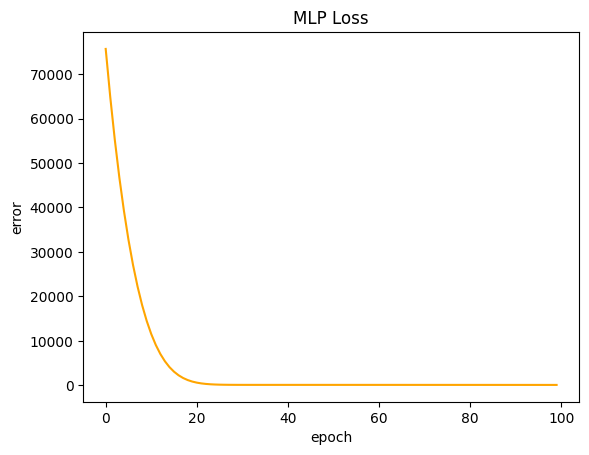

In [60]:
plt.plot(output_perceptron.history['loss'], c='orange')
plt.title("MLP Loss")
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()

### **Compare MLP and Perceptron**

In [63]:
from tabulate import tabulate

results = [
    ["Multi Layer Perceptron", loss_mlp],
    ["Single (One) Layer Perceptron", loss_perceptron]
]

print(tabulate(results, headers=["Model", "Loss"], tablefmt="grid"))

+-------------------------------+---------+
| Model                         |    Loss |
+===============================+=========+
| Multi Layer Perceptron        | 13.3313 |
+-------------------------------+---------+
| Single (One) Layer Perceptron | 90.1282 |
+-------------------------------+---------+
